# Homework 2

Introduction: The purpose of this homework will be to identify potential jargon. In order to accomplish this we will employ two small small document corpora. One will be related to news and the other will be from government documents. Your task will be to implement a simple jargon identifier.

In order to accomplish this task you will need to perform several steps. The first relates to identifying the word distributions in the base corpus. We will be using the Reuters news corpus as it is freely available in NLTK. For a jargon corpus we will be making use of DOD OIG reports that we have seen in the past. 

A first step will be to tokenize the documents in both sets. Then, you will try to simply look at the differences in tokens seen. 

But just looking at token differences isn't very sophisticated. We will also try to compare the probability of tokens occuring in each corpus as a mechanism to evaluate which tokens might be jargon.

## Step 1: Get a sample corpus

Reuters Corpus contains 10,788 news document totaling 1.3 million 
words. The documents have been classified into 90 topics, and grouped 
into two sets, called "training" and "test"; thus, the text with 
fileid 'test/14826' is a document drawn from the test set.
https://www.nltk.org/book/ch02.html

In [1]:
import nltk, re
nltk.download('reuters') 
nltk.download('punkt')
nltk.download('stopwords')
from nltk import data, FreqDist
from nltk.util import bigrams, unique_list
from nltk.corpus import reuters, stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
from nltk.probability import *
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

dir_base = "/Users/Nopphiphat/Desktop/data"
print(str(len(reuters.fileids())) + " datasets")
reuters.fileids()
## print(reuters.categories())

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Nopphiphat\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nopphiphat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nopphiphat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


10788 datasets


['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [2]:
## Function to process text
def text_processing(text):    
    #  Removing punctuation & set of symbols [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]
    text = re.sub(r'(\d+(\—)\d+)+?', '', text, flags = re.I)
    #text = re.sub(r'\d+', '', text, flags = re.I)
    text = re.sub(r'\!+$', ' ', text, flags = re.I)
    text = re.sub(r'\<', ' ', text, flags = re.I)
    text = re.sub(r'\>', ' ', text, flags = re.I)
    text = re.sub(r'\=', ' ', text, flags = re.I)
    text = re.sub(r'\|', ' ', text, flags = re.I)
    text = re.sub(r'\&', ' ', text, flags = re.I)
    text = re.sub(r'\%', ' ', text, flags = re.I)
    text = re.sub(r'\+', ' ', text, flags = re.I)
    #text = re.sub(r'\-', ' ', text, flags = re.I)
    text = re.sub(r'\—', ' ', text, flags = re.I)
    text = re.sub(r'\*', ' ', text, flags = re.I)
    text = re.sub(r'\/', ' ', text, flags = re.I)
    text = re.sub(r'\^', ' ', text, flags = re.I)
    text = re.sub(r'\(', ' ', text, flags = re.I)
    text = re.sub(r'\)', ' ', text, flags = re.I)
    text = re.sub(r'\{', ' ', text, flags = re.I)
    text = re.sub(r'\}', ' ', text, flags = re.I)
    text = re.sub(r'\[', ' ', text, flags = re.I)
    text = re.sub(r'\]', ' ', text, flags = re.I)
    text = re.sub(r'\`', ' ', text, flags = re.I)
    text = re.sub(r'\'', ' ', text, flags = re.I)
    text = re.sub(r'\’', ' ', text, flags = re.I)
    text = re.sub(r'\"', ' ', text, flags = re.I)
    text = re.sub(r'\“', ' ', text, flags = re.I)
    text = re.sub(r'\”', ' ', text, flags = re.I)
    text = re.sub(r'\#', ' ', text, flags = re.I)
    text = re.sub(r'\$', ' ', text, flags = re.I)
    text = re.sub(r'\@', ' ', text, flags = re.I)
    text = re.sub(r'\§', '', text, flags = re.I)
    text = re.sub(r'\~', ' ', text, flags = re.I)
    text = re.sub(r'\:', ' ', text, flags = re.I)
    text = re.sub(r'\;', ' ', text, flags = re.I)
    text = re.sub(r'\?+$', ' ', text, flags = re.I)
    text = re.sub(r'\,', ' ', text, flags = re.I)
    text = re.sub(r'\•', ' ', text, flags = re.I)
    
    #  Replacing "\n" with " "
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+',' ',text, flags = re.I)
    text = re.sub(r'^\s+',' ',text, flags = re.I)
    text = re.sub(r'\s+$',' ',text, flags = re.I)
    
    #text = re.sub(r'\ã', '', text, flags = re.I)
    #text = re.sub(r'\¤', '', text, flags = re.I)
    #text = re.sub(r'\â', '', text, flags = re.I)
    #text = re.sub(r'\¹', '', text, flags = re.I)
    #text = re.sub(r'\€', '', text, flags = re.I)
    ## '\W' == [^a-zA-Z0-9_], which exludes all numbers, letters, and _
    ## re.sub(r'\W+', '', doc_text, flags = re.I)
    #text = text.lower()
    return text;

In [3]:
## Creating empty list to store all the tokenized words
base_corpus_tokens = []
word_tokens = []
num_docs = len(reuters.fileids())
## Loading text from 25 documents (limiting to 25 since its large files)
for doc in reuters.fileids()[0:25]: 
    ## doc variable refers to fileid such as 'text/14826'
    ## doc_text variable provides a text version of the news article. 
    ## This could be tokenized.
    doc_text = reuters.open(doc).read()
    doc_text = text_processing(doc_text)
    ## Tokenize the sentences into tokens and compile them into 1 list
    word_tokens += word_tokenize(doc_text)
## Remove stopwords like "an", "a", "the"
base_corpus_tokens = [w for w in word_tokens if not w in stop_words]
for token in base_corpus_tokens:
    ## Remove symbol "."
    if token == ".":
        base_corpus_tokens.remove(token)
    if token.isdigit():
        base_corpus_tokens.remove(token)
print(str(len(base_corpus_tokens)) + " base tokens")
base_corpus_tokens

3740 base tokens


['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U.S.-JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction',
 'U.S.',
 'And',
 'Japan',
 'raised',
 'fears',
 'among',
 'many',
 'Asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far-reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'They',
 'told',
 'Reuter',
 'correspondents',
 'Asian',
 'capitals',
 'U.S.',
 'Move',
 'Japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'U.S.',
 'And',
 'lead',
 'curbs',
 'American',
 'imports',
 'products',
 'But',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long-run',
 'short-term',
 'Tokyo',
 'loss',
 'might',
 'gain',
 'The',
 'U.S.',
 'Has',
 'said',
 'impose',
 'mln',
 'dlrs',
 'tariffs',
 'imports',
 'Japanese',
 'electronics',
 'goods',
 'April',
 'retaliation',
 'Japan',
 'alleged',
 'failure',
 'stick',
 'pact',
 'sell',
 'semiconductors',
 'world',
 'markets',
 'cost',
 'Unofficial',
 'Japanese',
 'estimates',
 'put',
 'impact

In [4]:
## Create word_dictionary for base corpus
word_dictionary = {}
for word in base_corpus_tokens:
    try: word_dictionary[word] += 1
    except KeyError: word_dictionary[word] = 1

## Creating unique list of keys from word_dictionary
unique_base_corpus = word_dictionary.keys()
print(str(len(unique_base_corpus)) + " unique_words")
unique_base_corpus

1751 unique_words


dict_keys(['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'U.S.', 'And', 'Japan', 'raised', 'fears', 'among', 'many', 'Asia', 'exporting', 'nations', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'officials', 'said', 'They', 'told', 'Reuter', 'correspondents', 'Asian', 'capitals', 'Move', 'might', 'boost', 'protectionist', 'sentiment', 'lead', 'curbs', 'American', 'imports', 'products', 'But', 'exporters', 'conflict', 'would', 'hurt', 'long-run', 'short-term', 'Tokyo', 'loss', 'gain', 'The', 'Has', 'impose', 'mln', 'dlrs', 'tariffs', 'Japanese', 'electronics', 'goods', 'April', 'retaliation', 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost', 'Unofficial', 'estimates', 'put', 'impact', 'billion', 'spokesmen', 'major', 'firms', 'virtually', 'halt', 'exports', 'hit', 'new', 'taxes', 'We', 'able', 'business', 'spokesman', 'leading', 'firm', 'Matsushita', 'Ele

Step 2: Get a potential jargon corpus

In [5]:
## Function to read file
def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

## Function to read files from directory
def read_directory_files(directory):
    file_texts = []
    ## listdir() returns a list containing names of the entries in dir
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    ## print(files)
    for f in files:
        file_text = read_file(join(directory, f))
        ## print(file_text)
        file_texts.append({"file": f, "content": file_text })
    return file_texts

In [6]:
## Loading the documents from the directory
jargon_corpus = read_directory_files(dir_base)
print(str(len(jargon_corpus)) + " documents")
jargon_corpus

8 documents


[{'file': 'air-forces-f-15-eagle-passiveactive-warning-survivability-system-dodig-2018-121',
  'content': '\n\n\nMay 21, 2018  —\n\n\n\nObjective:\nWe determined whether Air Force officials updated the Eagle Passive/Active Warning and Survivability System (EPAWSS) test and evaluation master plan to respond to concerns raised by Air Force and DoD test officials, developed an EPAWSS design that can meet capability requirements, and evaluated the F-15C EPAWSS production plan during the engineering and manufacturing development phase.\nBackground:\nThe Air Force’s EPAWSS program is an acquisition category IC major defense program with estimated program costs of $876 million in research, development, test, and evaluation, and $3.4 billion in procurement.1 EPAWSS upgrades F-15C and F-15E aircraft electronic warfare capabilities to detect and identify air and ground threats, employ counter-measures, and jam enemy radar signals. The F-15 is an all-weather, day and night, tactical fighter aircr

In [7]:
## Storing tokens from the jargon corpus 
jargon_tokens = []
word_tokens = []
for i in range(len(jargon_corpus)):
    text_corpus = jargon_corpus[i]['content']
    text_corpus = text_processing(text_corpus)
    word_tokens += word_tokenize(text_corpus)
    
## Remove stopwords like "an", "a", "the"
jargon_tokens = [w for w in word_tokens if not w in stop_words]
#regex = '[+-]?[0-9]+\.[0-9]+'
for token in jargon_tokens:
    ## Remove symbol "."
    if token == ".":
        jargon_tokens.remove(token)
    #if re.search(regex, token):
    #    jargon_tokens.remove(token)
    if token.isdigit():
        jargon_tokens.remove(token)
print(str(len(jargon_tokens)) + " jargon tokens")
jargon_tokens

4586 jargon tokens


['May',
 'Objective',
 'We',
 'determined',
 'whether',
 'Air',
 'Force',
 'officials',
 'updated',
 'Eagle',
 'Passive',
 'Active',
 'Warning',
 'Survivability',
 'System',
 'EPAWSS',
 'test',
 'evaluation',
 'master',
 'plan',
 'respond',
 'concerns',
 'raised',
 'Air',
 'Force',
 'DoD',
 'test',
 'officials',
 'developed',
 'EPAWSS',
 'design',
 'meet',
 'capability',
 'requirements',
 'evaluated',
 'F-15C',
 'EPAWSS',
 'production',
 'plan',
 'engineering',
 'manufacturing',
 'development',
 'phase',
 'Background',
 'The',
 'Air',
 'Force',
 'EPAWSS',
 'program',
 'acquisition',
 'category',
 'IC',
 'major',
 'defense',
 'program',
 'estimated',
 'program',
 'costs',
 'million',
 'research',
 'development',
 'test',
 'evaluation',
 '3.4',
 'billion',
 'procurement.1',
 'EPAWSS',
 'upgrades',
 'F-15C',
 'F-15E',
 'aircraft',
 'electronic',
 'warfare',
 'capabilities',
 'detect',
 'identify',
 'air',
 'ground',
 'threats',
 'employ',
 'counter-measures',
 'jam',
 'enemy',
 'radar',
 

In [8]:
## Identifying data distributions
data_dictionary = {}
for word in jargon_tokens:
    try: data_dictionary[word] += 1
    except KeyError: data_dictionary[word] = 1

## Creating unique list of keys from data_dictionary
unique_jargon = data_dictionary.keys()
unique_jargon

dict_keys(['May', 'Objective', 'We', 'determined', 'whether', 'Air', 'Force', 'officials', 'updated', 'Eagle', 'Passive', 'Active', 'Warning', 'Survivability', 'System', 'EPAWSS', 'test', 'evaluation', 'master', 'plan', 'respond', 'concerns', 'raised', 'DoD', 'developed', 'design', 'meet', 'capability', 'requirements', 'evaluated', 'F-15C', 'production', 'engineering', 'manufacturing', 'development', 'phase', 'Background', 'The', 'program', 'acquisition', 'category', 'IC', 'major', 'defense', 'estimated', 'costs', 'million', 'research', '3.4', 'billion', 'procurement.1', 'upgrades', 'F-15E', 'aircraft', 'electronic', 'warfare', 'capabilities', 'detect', 'identify', 'air', 'ground', 'threats', 'employ', 'counter-measures', 'jam', 'enemy', 'radar', 'signals', 'F-15', 'all-weather', 'day', 'night', 'tactical', 'fighter', 'designed', 'gain', 'maintain', 'control', 'battlefield', 'In', 'November', 'started', 'cycle', 'began', 'develop', 'build', 'prototypes', 'verify', 'met', 'support', 'de

Step 3: Identify words unique to the jargon corpus

In [9]:
## Identifying the difference of membership between two sets
## Identifying distinct tokens relevant to news corpus
real_news = []
for i in base_corpus_tokens:
    ## Identify distinct elements for news corpus
    if i not in set(jargon_tokens):
        real_news.append(i)
real_news = list(set(real_news))
print(str(len(real_news)) + " tokens are unique to news corpus")
real_news

1471 tokens are unique to news corpus


['employed',
 'initially',
 'creation',
 'excessive',
 'general',
 'survey',
 'Line',
 'balances',
 'mines',
 'MARKS',
 'decline',
 'Several',
 'weak',
 'juice',
 'Austwhim',
 'Canada',
 'WHIM',
 'fall',
 'SOLD',
 'seven',
 'Bowater',
 'forbidden',
 'province',
 'QUICK',
 'Button',
 'declined',
 'OPEN',
 'Lyon',
 'show',
 'fiscal',
 'Pressure',
 'Two',
 'actively',
 'quotas',
 'TRADE',
 'lose',
 'BONUS',
 'large',
 'restraining',
 'enlarged',
 'taking',
 'lending',
 'Monday',
 'MARKET',
 'must',
 'beans',
 'Sogo',
 'slowly',
 'visit',
 'England',
 'important',
 'fears',
 'UNIT',
 'country',
 'largest',
 'sauce',
 'widely',
 'nuclear',
 'warning',
 'Banca',
 'francs',
 'THAI',
 'call',
 'interests',
 'Indonesian',
 'AMAA.S',
 'Arabia',
 'Demands',
 'ask',
 'although',
 'size',
 'Packaging',
 'Gold',
 'routes',
 'natural',
 'early',
 'tertiary',
 'Bank',
 'Beef',
 'Inc',
 'ounces',
 'length',
 'products',
 'German',
 'helped',
 'fell',
 'Turnover',
 'stocks',
 'countries',
 'dispute',
 '

In [10]:
## Identifying distinct tokens relevant to jargon corpus
real_jargon = []
for i in jargon_tokens:
    ## Identify distinct elements for jargon corpus
    if i not in set(base_corpus_tokens):
        real_jargon.append(i)
real_jargon = list(set(real_jargon))
print(str(len(real_jargon)) + " tokens are unique to jargon corpus")
set(real_jargon)

931 tokens are unique to jargon corpus


{'-year',
 '.1',
 '1',
 '1-year',
 '1.8',
 '113-66',
 '114-577',
 '12',
 '13',
 '1341',
 '14',
 '19',
 '2',
 '2013',
 '2014',
 '2014.1',
 '2016',
 '2016.2',
 '2017',
 '2018',
 '2533a',
 '3',
 '3-year',
 '3.4',
 '3.58',
 '32',
 '382',
 '386.9',
 '4',
 '40.3',
 '453.2',
 '56',
 '56.4',
 '6‑month',
 '7.7',
 '70.3',
 '700.4',
 '7000.14-R',
 'A5',
 'AF',
 'ATO',
 'Accountability',
 'Acquisition',
 'Act.3',
 'Actions',
 'Active',
 'Activity',
 'Additionally',
 'Administration',
 'Agile',
 'Air',
 'Although',
 'Amendment',
 'Antideficiency',
 'Appropriations',
 'Army',
 'Assessments',
 'Assistant',
 'Audit',
 'Aug.',
 'Authorization',
 'Aviation',
 'Background',
 'Because',
 'Berry',
 'Buy',
 'CORs',
 'Center',
 'Certification',
 'Chief',
 'Class',
 'Code',
 'Collaboration',
 'Command',
 'Commander',
 'Comments',
 'Committee',
 'Compile',
 'Component',
 'Comptroller',
 'Comptrollers',
 'Congress',
 'Contract',
 'Contracting',
 'Contracts',
 'Corps',
 'Corrective',
 'Cybersecurity',
 'D2016-D0

In [11]:
## Jargon is the specialized terminology associated with a particular
## field or area of activity. Jargon is normally employed in a 
## particular communicative context and may not be well understood 
## outside that context. Any ingroup or particular occupation can 
## have jargon. 

## Filter the real_jargon using jargon characteristics
jargon = []
for token in real_jargon:
    ## Jargon as UPPERCASE abbreviation:
    if token.isupper() == True:
        jargon.append(token)
    if (re.compile("[A-Z][A-Z]+([a-z]+)?")).match(token):
        if token not in jargon and token.isdigit() == False:
            jargon.append(token)
    ## Jargon as anything with "-" in between
    if (re.compile("([A-Z]?[a-zA-Z]+)?\-([A-Z]?[a-zA-Z]+)?")).match(token):
        if token not in jargon and token.isdigit() == False:
            jargon.append(token)
    ## Jargon as abbreviation that contains "." 
    if (re.compile("([A-Z]+?[a-zA-Z]+)?\.([A-Z]+?[a-zA-Z]+)?")).match(token):
        if token not in jargon and token.isdigit() == False:
            jargon.append(token)
real_jargon = jargon
jargon = []
print(str(len(real_jargon)) + " filtered jargon")
real_jargon

72 filtered jargon


['re-validate',
 'e-mail',
 'DHA',
 'labor-hour',
 'CORs',
 'well-defined',
 'ATO',
 'F-15',
 'F-15C',
 'DLA',
 'F-15E',
 'air-to-air',
 'FY',
 're-perform',
 'IT',
 'higher-level',
 'cost-plus-incentive-fee',
 'EPAWSS',
 'DCS',
 'domestically-produced',
 'firm-fixed-price',
 'SOCPAC',
 'F-22',
 'in-house',
 'non-U.S.-manufactured',
 'DISA',
 'enterprise-wide',
 'domestic-sourcing',
 'air-to-ground',
 'sole-source',
 'IGEs',
 'HIV',
 'DTRA',
 'mission-critical',
 'A5',
 'foreign-made',
 'SAFe',
 'WHS',
 'counter-measures',
 'DCMA',
 'SPE1C1-15-M-2729',
 '7000.14-R',
 're-validating',
 'multi-functional',
 'set-aside',
 'WRAIR',
 'DPAP',
 'J8',
 'POSC',
 'III',
 'SRRB',
 'U.S.C',
 're-performed',
 'non-compliant',
 'fixed-price',
 'Aug.',
 'IC',
 '-year',
 'all-weather',
 'USPACOM',
 'D2016-D000CG-0140.000',
 'AF',
 'post-award',
 'GSA',
 'pre-',
 '.1',
 'SPMYM2-15-C-0007',
 'Act.3',
 'non-HIV',
 'co-locating',
 'contract-specific',
 'SRRBs']

In [12]:
## Check the distribution of real_jargon in actual corpus
real_jargon_dictionary = {}
jargon_list = []
for token in jargon_tokens:
    if token in real_jargon:
        try: real_jargon_dictionary[token] += 1
        except: real_jargon_dictionary[token] = 1
        jargon_list.append(token)
real_jargon_dictionary

{'EPAWSS': 25,
 'F-15C': 17,
 'IC': 1,
 'F-15E': 2,
 'counter-measures': 2,
 'F-15': 3,
 'all-weather': 1,
 'DCS': 21,
 'AF': 6,
 'A5': 6,
 'HIV': 11,
 'in-house': 5,
 'co-locating': 1,
 'non-HIV': 3,
 'WRAIR': 1,
 're-perform': 1,
 'well-defined': 1,
 're-performed': 2,
 'F-22': 14,
 'SAFe': 5,
 'air-to-air': 1,
 'air-to-ground': 1,
 'DCMA': 37,
 'IT': 17,
 'CORs': 10,
 'FY': 2,
 'firm-fixed-price': 1,
 'multi-functional': 1,
 'pre-': 1,
 'post-award': 1,
 'labor-hour': 1,
 'contract-specific': 1,
 'mission-critical': 2,
 'DISA': 15,
 '.1': 1,
 'ATO': 15,
 '-year': 1,
 'enterprise-wide': 1,
 'DLA': 32,
 'foreign-made': 1,
 'domestically-produced': 2,
 'Act.3': 1,
 'non-U.S.-manufactured': 1,
 'set-aside': 2,
 'domestic-sourcing': 1,
 'non-compliant': 1,
 '7000.14-R': 2,
 'SPE1C1-15-M-2729': 4,
 'SPMYM2-15-C-0007': 2,
 'U.S.C': 2,
 'D2016-D000CG-0140.000': 1,
 'Aug.': 1,
 'GSA': 6,
 'WHS': 13,
 'DHA': 6,
 'DTRA': 10,
 'DPAP': 12,
 'fixed-price': 1,
 'IGEs': 3,
 'sole-source': 1,
 'USPA

Step 4: Refine differences in corpora using frequency information

In [13]:
## Identifying word distributions
## word_frequency = [(item, base_corpus_tokens.count(item)) for item in unique_word_tokens]
## Creating word_frequency by sorting dictionary items by its value in decreasing order        
word_frequency = sorted(word_dictionary.items(), key = lambda x: x[1], reverse = True)

word_dictionary = {}
for i in range(len(word_frequency)):
    word_dictionary[word_frequency[i][0]] = word_frequency[i][1]
word_dictionary

{'said': 125,
 'mln': 53,
 'pct': 43,
 'The': 42,
 'U.S.': 35,
 'billion': 35,
 'Japan': 29,
 'dlrs': 26,
 'year': 26,
 'lt': 23,
 'trade': 21,
 'would': 19,
 'also': 17,
 'market': 16,
 'It': 16,
 '.': 16,
 'surplus': 15,
 'exports': 14,
 'U.S': 14,
 'exchange': 14,
 'oil': 14,
 'bank': 14,
 'Sumitomo': 14,
 'imports': 13,
 'South': 13,
 'first': 13,
 'statement': 13,
 'vs': 13,
 'But': 12,
 'business': 12,
 'two': 12,
 'products': 11,
 'We': 11,
 'Ltd': 11,
 'last': 11,
 'government': 11,
 'new': 10,
 'largest': 10,
 'Korea': 10,
 'Japanese': 9,
 'foreign': 9,
 'trading': 9,
 'around': 9,
 'Komatsu': 9,
 'securities': 9,
 'Atlas': 9,
 'stg': 9,
 'officials': 8,
 'lead': 8,
 'official': 8,
 'one': 8,
 'Minister': 8,
 'Trade': 8,
 'tonnes': 8,
 'demand': 8,
 'rubber': 8,
 'today': 8,
 'five': 8,
 'profit': 8,
 'economic': 7,
 'told': 7,
 'time': 7,
 'import': 7,
 'A': 7,
 'share': 7,
 'He': 7,
 'Australia': 7,
 'expected': 7,
 'rise': 7,
 'quarter': 7,
 'increase': 7,
 'palm': 7,
 'gol

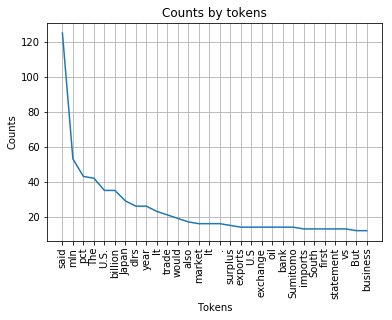

In [14]:
## Base distribution
Freq_Base_Tokens = nltk.FreqDist(base_corpus_tokens)
#Freq_Base_Tokens.plot(25)
XY = Freq_Base_Tokens.items()
XY = sorted(XY, key=lambda pair: pair[1], reverse = True)
XY.sort(key = lambda pair:pair[1], reverse = True)
limit = 30
X = [x for (x, y) in XY[:limit]]
Y = [y for (x, y) in XY[:limit]]
nX = range(len(X))
plt.figure()
plt.plot(nX, Y)
plt.xticks(nX, X, rotation = 'vertical')
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Counts by tokens')
plt.grid()
plt.show()

In [15]:
## Compute Maximum likelihood estimator using MLEProbDist function
BaseTokenPD = MLEProbDist(Freq_Base_Tokens)
Freq_Base_Tokens.freq('.')
## Compute the probability associated with each token
Freq_Base_Prob = [(sample, BaseTokenPD.prob(sample)) for sample in BaseTokenPD.samples()]
Freq_Base_Prob.sort(key = lambda pair: pair[1], reverse = True)
Freq_Base_Prob

[('said', 0.03342245989304813),
 ('mln', 0.014171122994652407),
 ('pct', 0.011497326203208556),
 ('The', 0.011229946524064172),
 ('U.S.', 0.009358288770053475),
 ('billion', 0.009358288770053475),
 ('Japan', 0.007754010695187166),
 ('dlrs', 0.006951871657754011),
 ('year', 0.006951871657754011),
 ('lt', 0.006149732620320855),
 ('trade', 0.005614973262032086),
 ('would', 0.0050802139037433155),
 ('also', 0.004545454545454545),
 ('market', 0.0042780748663101605),
 ('It', 0.0042780748663101605),
 ('.', 0.0042780748663101605),
 ('surplus', 0.004010695187165776),
 ('exports', 0.0037433155080213902),
 ('U.S', 0.0037433155080213902),
 ('exchange', 0.0037433155080213902),
 ('oil', 0.0037433155080213902),
 ('bank', 0.0037433155080213902),
 ('Sumitomo', 0.0037433155080213902),
 ('imports', 0.0034759358288770055),
 ('South', 0.0034759358288770055),
 ('first', 0.0034759358288770055),
 ('statement', 0.0034759358288770055),
 ('vs', 0.0034759358288770055),
 ('But', 0.0032085561497326204),
 ('business

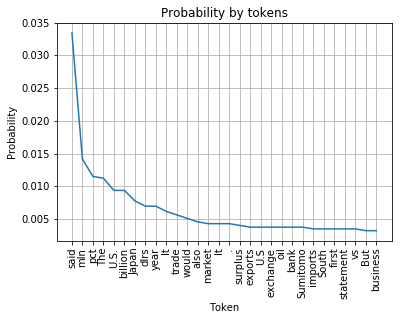

In [16]:
## Plot the probability distribution for token in base_corpus
limit = 30
Base_X = [t for (t, p) in Freq_Base_Prob[:limit]]
Base_Y = [p for (t, p) in Freq_Base_Prob[:limit]]
Base_nX = range(limit)
plt.figure()
plt.plot(Base_nX, Base_Y)
plt.xticks(Base_nX, Base_X, rotation='vertical')
plt.xlabel('Token')
plt.ylabel('Probability')
plt.title('Probability by tokens')
plt.grid()
plt.show()

In [17]:
## Creating data_frequency by sorting dictionary items by its value in decreasing order        
data_frequency = sorted(data_dictionary.items(), key = lambda x: x[1], reverse = True)

data_dictionary = {}
for i in range(len(data_frequency)):
    data_dictionary[data_frequency[i][0]] = data_frequency[i][1]
data_dictionary

{'contracting': 67,
 'The': 57,
 'contracts': 54,
 'officials': 41,
 'Defense': 39,
 'We': 38,
 'DCMA': 37,
 'requirements': 35,
 'software': 34,
 'contract': 34,
 'DoD': 33,
 'Director': 33,
 'DLA': 32,
 'personnel': 31,
 'program': 26,
 'SRRB': 26,
 'EPAWSS': 25,
 'recommendations': 25,
 'analysis': 25,
 'Force': 24,
 'price': 24,
 'Air': 23,
 'guidance': 23,
 'officers': 23,
 'USPACOM': 23,
 'In': 22,
 'items': 22,
 'whether': 21,
 'DCS': 21,
 'Act': 21,
 'training': 21,
 'development': 20,
 'service': 20,
 'Office': 20,
 'services': 19,
 'Federal': 19,
 'orders': 19,
 'risk': 19,
 'ensure': 18,
 'testing': 18,
 'Acquisition': 18,
 'F-15C': 17,
 'million': 17,
 'agreed': 17,
 'addition': 17,
 'Agency': 17,
 'IT': 17,
 'Berry': 17,
 'Amendment': 17,
 'develop': 16,
 'Logistics': 16,
 'controls': 16,
 'Specifically': 15,
 'DISA': 15,
 'ATO': 15,
 'noncompliant': 15,
 'determined': 14,
 'review': 14,
 'business': 14,
 'F-22': 14,
 'Program': 14,
 'high': 14,
 'SOCPAC': 14,
 'Chief': 13

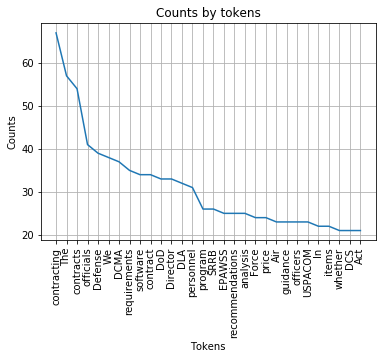

In [18]:
## Jargon distribution without selection rules
Freq_Jargon_Original = nltk.FreqDist(jargon_tokens)
#Freq_Jargon_Original.plot(25)
XY = Freq_Jargon_Original.items()
XY = sorted(XY, key=lambda pair: pair[1], reverse = True)
XY.sort(key = lambda pair:pair[1], reverse = True)
limit = 30
X = [x for (x, y) in XY[:limit]]
Y = [y for (x, y) in XY[:limit]]
nX = range(len(X))
plt.figure()
plt.plot(nX, Y)
plt.xticks(nX, X, rotation = 'vertical')
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Counts by tokens')
plt.grid()
plt.show()

In [19]:
## Compute Maximum likelihood estimator using MLEProbDist function
JargonOriginalTokenPD = MLEProbDist(Freq_Jargon_Original)
Freq_Jargon_Original.freq('.')
## Compute the probability associated with each token
Freq_JargonOriginal_Prob = [(sample, JargonOriginalTokenPD.prob(sample)) for sample in JargonOriginalTokenPD.samples()]
Freq_JargonOriginal_Prob.sort(key = lambda pair: pair[1], reverse = True)
Freq_JargonOriginal_Prob

[('contracting', 0.014609681639773223),
 ('The', 0.012429132141299608),
 ('contracts', 0.011774967291757523),
 ('officials', 0.008940252943741823),
 ('Defense', 0.0085041430440471),
 ('We', 0.008286088094199739),
 ('DCMA', 0.008068033144352376),
 ('requirements', 0.007631923244657654),
 ('software', 0.007413868294810292),
 ('contract', 0.007413868294810292),
 ('DoD', 0.00719581334496293),
 ('Director', 0.00719581334496293),
 ('DLA', 0.006977758395115569),
 ('personnel', 0.0067597034452682074),
 ('program', 0.0056694286960314),
 ('SRRB', 0.0056694286960314),
 ('EPAWSS', 0.005451373746184038),
 ('recommendations', 0.005451373746184038),
 ('analysis', 0.005451373746184038),
 ('Force', 0.005233318796336677),
 ('price', 0.005233318796336677),
 ('Air', 0.005015263846489315),
 ('guidance', 0.005015263846489315),
 ('officers', 0.005015263846489315),
 ('USPACOM', 0.005015263846489315),
 ('In', 0.004797208896641954),
 ('items', 0.004797208896641954),
 ('whether', 0.004579153946794592),
 ('DCS', 

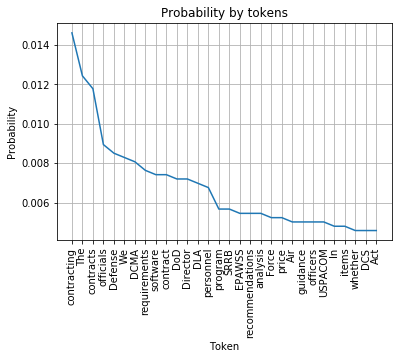

In [20]:
## Plot the probability distribution for token in jargon_original
limit = 30
JargonOriginal_X = [t for (t, p) in Freq_JargonOriginal_Prob[:limit]]
JargonOriginal_Y = [p for (t, p) in Freq_JargonOriginal_Prob[:limit]]
JargonOriginal_nX = range(limit)
plt.figure()
plt.plot(JargonOriginal_nX, JargonOriginal_Y)
plt.xticks(JargonOriginal_nX, JargonOriginal_X, rotation='vertical')
plt.xlabel('Token')
plt.ylabel('Probability')
plt.title('Probability by tokens')
plt.grid()
plt.show()

In [21]:
## Creating jargon_frequency by sorting dictionary items by its value in decreasing order        
jargon_frequency = sorted(real_jargon_dictionary.items(), key = lambda x: x[1], reverse = True)

jargon_dictionary = {}
for i in range(len(jargon_frequency)):
    jargon_dictionary[jargon_frequency[i][0]] = jargon_frequency[i][1]
jargon_dictionary

{'DCMA': 37,
 'DLA': 32,
 'SRRB': 26,
 'EPAWSS': 25,
 'USPACOM': 23,
 'DCS': 21,
 'F-15C': 17,
 'IT': 17,
 'DISA': 15,
 'ATO': 15,
 'F-22': 14,
 'SOCPAC': 14,
 'WHS': 13,
 'DPAP': 12,
 'HIV': 11,
 'POSC': 11,
 'III': 11,
 'CORs': 10,
 'DTRA': 10,
 'AF': 6,
 'A5': 6,
 'GSA': 6,
 'DHA': 6,
 'in-house': 5,
 'SAFe': 5,
 'SPE1C1-15-M-2729': 4,
 'F-15': 3,
 'non-HIV': 3,
 'IGEs': 3,
 'J8': 3,
 'F-15E': 2,
 'counter-measures': 2,
 're-performed': 2,
 'FY': 2,
 'mission-critical': 2,
 'domestically-produced': 2,
 'set-aside': 2,
 '7000.14-R': 2,
 'SPMYM2-15-C-0007': 2,
 'U.S.C': 2,
 're-validate': 2,
 'IC': 1,
 'all-weather': 1,
 'co-locating': 1,
 'WRAIR': 1,
 're-perform': 1,
 'well-defined': 1,
 'air-to-air': 1,
 'air-to-ground': 1,
 'firm-fixed-price': 1,
 'multi-functional': 1,
 'pre-': 1,
 'post-award': 1,
 'labor-hour': 1,
 'contract-specific': 1,
 '.1': 1,
 '-year': 1,
 'enterprise-wide': 1,
 'foreign-made': 1,
 'Act.3': 1,
 'non-U.S.-manufactured': 1,
 'domestic-sourcing': 1,
 'non-co

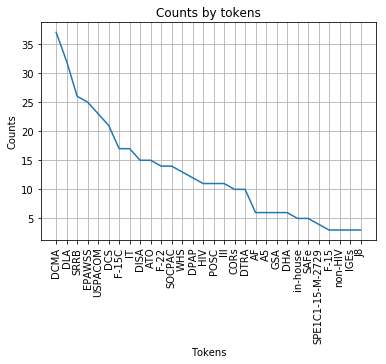

In [22]:
## Jargon distribution after selection rules
Freq_Jargon_Cleaned = nltk.FreqDist(jargon_list)
#Freq_Jargon_Cleaned.plot(25)
XY = Freq_Jargon_Cleaned.items()
XY = sorted(XY, key=lambda pair: pair[1], reverse = True)
XY.sort(key = lambda pair:pair[1], reverse = True)
limit = 30
X = [x for (x, y) in XY[:limit]]
Y = [y for (x, y) in XY[:limit]]
nX = range(len(X))
plt.figure()
plt.plot(nX, Y)
plt.xticks(nX, X, rotation = 'vertical')
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Counts by tokens')
plt.grid()
plt.show()

In [23]:
## Top 20 most common jargon 
#Freq_Jargon_Cleaned.tabulate(20)
Freq_Jargon_Cleaned.most_common(20)

[('DCMA', 37),
 ('DLA', 32),
 ('SRRB', 26),
 ('EPAWSS', 25),
 ('USPACOM', 23),
 ('DCS', 21),
 ('F-15C', 17),
 ('IT', 17),
 ('DISA', 15),
 ('ATO', 15),
 ('F-22', 14),
 ('SOCPAC', 14),
 ('WHS', 13),
 ('DPAP', 12),
 ('HIV', 11),
 ('POSC', 11),
 ('III', 11),
 ('CORs', 10),
 ('DTRA', 10),
 ('AF', 6)]

In [24]:
## Compute Maximum likelihood estimator using MLEProbDist function
JargonCleanedTokenPD = MLEProbDist(Freq_Jargon_Cleaned)
Freq_Jargon_Cleaned.freq('.')
## Compute the probability associated with each token
Freq_JargonCleaned_Prob = [(sample, JargonCleanedTokenPD.prob(sample)) for sample in JargonCleanedTokenPD.samples()]
Freq_JargonCleaned_Prob.sort(key = lambda pair: pair[1], reverse = True)
Freq_JargonCleaned_Prob

[('DCMA', 0.08466819221967964),
 ('DLA', 0.07322654462242563),
 ('SRRB', 0.059496567505720827),
 ('EPAWSS', 0.057208237986270026),
 ('USPACOM', 0.05263157894736842),
 ('DCS', 0.04805491990846682),
 ('F-15C', 0.038901601830663615),
 ('IT', 0.038901601830663615),
 ('DISA', 0.034324942791762014),
 ('ATO', 0.034324942791762014),
 ('F-22', 0.032036613272311214),
 ('SOCPAC', 0.032036613272311214),
 ('WHS', 0.029748283752860413),
 ('DPAP', 0.02745995423340961),
 ('HIV', 0.02517162471395881),
 ('POSC', 0.02517162471395881),
 ('III', 0.02517162471395881),
 ('CORs', 0.02288329519450801),
 ('DTRA', 0.02288329519450801),
 ('AF', 0.013729977116704805),
 ('A5', 0.013729977116704805),
 ('GSA', 0.013729977116704805),
 ('DHA', 0.013729977116704805),
 ('in-house', 0.011441647597254004),
 ('SAFe', 0.011441647597254004),
 ('SPE1C1-15-M-2729', 0.009153318077803204),
 ('F-15', 0.006864988558352402),
 ('non-HIV', 0.006864988558352402),
 ('IGEs', 0.006864988558352402),
 ('J8', 0.006864988558352402),
 ('F-15E'

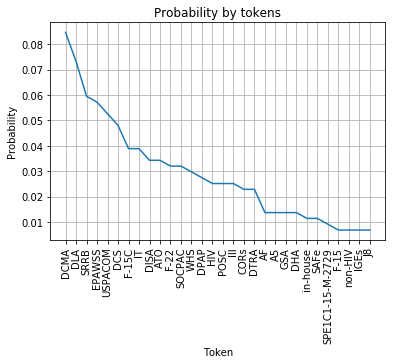

In [25]:
## Plot the probability distribution for token in jargon_original
limit = 30
JargonCleaned_X = [t for (t, p) in Freq_JargonCleaned_Prob[:limit]]
JargonCleaned_Y = [p for (t, p) in Freq_JargonCleaned_Prob[:limit]]
JargonCleaned_nX = range(limit)
plt.figure()
plt.plot(JargonCleaned_nX, JargonCleaned_Y)
plt.xticks(JargonCleaned_nX, JargonCleaned_X, rotation='vertical')
plt.xlabel('Token')
plt.ylabel('Probability')
plt.title('Probability by tokens')
plt.grid()
plt.show()

In [26]:
## Finding tokens in jargon corpus that have higher probability 
## of occurence than that in base corpus
high_probability_jargon = []
for i in Freq_JargonOriginal_Prob:
    for j in Freq_Base_Prob:
        if i[0] == j[0]:
            if i[1] > j[1]:
                high_probability_jargon.append(i)
print(str(len(high_probability_jargon)) + " tokens has higher probability")
high_probability_jargon

128 tokens has higher probability


[('The', 0.012429132141299608),
 ('contracts', 0.011774967291757523),
 ('officials', 0.008940252943741823),
 ('We', 0.008286088094199739),
 ('requirements', 0.007631923244657654),
 ('personnel', 0.0067597034452682074),
 ('program', 0.0056694286960314),
 ('price', 0.005233318796336677),
 ('officers', 0.005015263846489315),
 ('In', 0.004797208896641954),
 ('items', 0.004797208896641954),
 ('whether', 0.004579153946794592),
 ('Act', 0.004579153946794592),
 ('development', 0.00436109899694723),
 ('services', 0.004143044047099869),
 ('Federal', 0.004143044047099869),
 ('orders', 0.004143044047099869),
 ('ensure', 0.0039249890972525075),
 ('agreed', 0.003706934147405146),
 ('addition', 0.003706934147405146),
 ('Agency', 0.003706934147405146),
 ('controls', 0.0034888791975577847),
 ('review', 0.0030527692978630614),
 ('high', 0.0030527692978630614),
 ('use', 0.0028347143480157),
 ('open', 0.0028347143480157),
 ('American', 0.0028347143480157),
 ('provide', 0.002398604448320977),
 ('performanc

# Analysis of Results

Below this cell, please put a short writeup of your approach and comments on your results. The goal here is to explain how well you think your method worked based on looking at some of your output data. Additionally, please describe things you might do fifferently or ways in which you might improve the process if you were given more time.

The approach for my method is that I first compute acquire the tokens for the base corpus using reuters database as well as the tokens for jargon corpus through the given text data, preprocessed them by removing irrelevant symbols and integers. I then identified the unique tokens that are unique to each of the corpus by comparing if one tokens of one corpus appears in another corpus, and if it doesn't appear in another corpus, then the respective token is exclusive for the current corpus, and vice versa. Then I further filtered the tokens from jargon_corpus by using jargon's characteristics such as jargon tends to be all uppercase, abbreviations, or that they have "-" symbols. I continued on to find the frequency for their respective tokens and plots their distributions by counts and by probability in decending order. I then compared the token frequency from original jargon corpus against that of base corpus, and obtained 128 tokens in addition to the 72 tokens that were exclusively extracted through symbolic rules. 